<a href="https://colab.research.google.com/github/mikvikpik/nike_factory_classification/blob/master/07_31_2019_Revision_Unit_2_Notebook_Project_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial idea is to present project as a classifying model that uses Factory Type as **Target Vector**.  To have discrete data and unique classifiers, China will be used as **Test Set**, and Vietnam will be used as the  **Validation Set**. The remaining data will be used as **Training Set** data. The importance of this data is to be able to find a model that fits to countries of high factory count and use that model to test accuracy score and percentage of distribution of target vector against countries of smaller factory count in order to determine factory growth in that country by using a country of data size smaller than China or Vietnam.


As intial presenter, trainer, validator, tester, and further analyzer of the data set and model, importance remains with best practice and objectivity based on thorough self-examination to not skew or manipulate data in order to keep project free from bias.


As presenter of data, and acting as collector and decider of relevant information to train and test, any geographic data will be removed from the set to begin the rest of the model process to provide best objectivity. 

Data will be cleaned by the presentor to verify usable data, discard unusable data, and impute values as based in best practice.


As trainer, validator, and tester of the data, analysis and visualizations will be used to further evaluate data in order to prepare for classification machine learning algorithm. This algorithm will be modeled to the train dataset to fit, validate, and test for best accuracy score, confusion matrix, and classification report. 


Further analyzation of data is to be hypothetical in nature and to present best countries and factory types to be built next based on the model and the metric report provided by the machine learning algorithm group.

<h1> <center><u>Collection and Presentation Data Stage

In [0]:
# import libraries
import pandas as pd
import numpy as np

In [0]:
WEB = 'https://github.com/mikvikpik/nike_factory_classification/raw/master/nike_export.xls'
# read in dataset
factory = pd.read_excel(WEB, header=1)

First step of this stage is to get analysis of usable features, and search for possible acceptable target vector(s). 



---

Based on introduction of project, geographic data will be used to split data and then dismissed.

In [3]:
# determing shape of data
factory.shape
# showing 601 observations and 21 features

(601, 21)

In [4]:
# determining name of features
factory.columns
# split of data will be on 'Country / Region'

Index(['Factory Name', 'Factory Type', 'Product Type', 'Nike, Inc. Brand(s)',
       'Events', 'Supplier Group', 'Address', 'City', 'State', 'Postal Code',
       'Country / Region', 'Operating Region', 'Total Workers', 'Line Workers',
       '% Female Workers', '% Migrant Workers', 'Contact Name',
       'Contact Phone', 'Contact Fax', 'Contact Email', 'Subcons'],
      dtype='object')

In [5]:
# header view of feature to obtain data type and value for split
factory['Country / Region'].head()

0          USA
1      VIETNAM
2    GUATEMALA
3      VIETNAM
4      VIETNAM
Name: Country / Region, dtype: object

In [6]:
# determing data of best split values
factory['Country / Region'].value_counts().head()
# based on value of total observation to test CHINA and validate VIETNAM
# remaining data train

VIETNAM      122
CHINA        121
INDONESIA     44
USA           42
TAIWAN        38
Name: Country / Region, dtype: int64

In [0]:
# split of data
test_factory = factory[factory['Country / Region'] == 'CHINA']
validation_factory = factory[factory['Country / Region'] == 'VIETNAM']
train_factory = factory[factory['Country / Region'] != 'CHINA' ] 
train_factory = train_factory[train_factory['Country / Region'] != 'VIETNAM']

In [8]:
# validation of data by shape
test_factory.shape, validation_factory.shape, train_factory.shape

((121, 21), (122, 21), (358, 21))

Small training to test and validation data presents a problem of over or underfitting the model. Cross validation would seem best in this practice, however with the similar observation counts of 2 countries, Presentor of data is separating into train, validation, and test data to prevent a bias of large amount of data in train data set.

---

Next, will commence dropping of geographic data for objectivity, followed by dropping unusable data.

In [0]:
# drop columns list

drop_columns = ['Address', 'City', 'State', 'Postal Code', 'Country / Region',
                'Operating Region', 
                #geographic data
                
                'Contact Name', 'Contact Phone', 'Contact Fax', 'Contact Email',
               #unusable data
               ]

# test data drop
test_factory = test_factory.drop(columns = drop_columns)

#validate data drop
validation_factory = validation_factory.drop(columns = drop_columns)

# train data drop
train_factory = train_factory.drop(columns = drop_columns)

In [10]:
# shape validation, should see decrease in feature count
test_factory.shape, validation_factory.shape, train_factory.shape
# feature frops from 21 to 11

((121, 11), (122, 11), (358, 11))

Second stage requires further exploration of data to determine usable features.

In [11]:
# visual header overview of train data to determine unusable features
train_factory.head()
# features 'Events' and 'Subcons' have large Nan value count in header

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Total Workers,Line Workers,% Female Workers,% Migrant Workers,Subcons
0,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,NaN,A & K DESIGNS,104.0,90.0,64.0%,0.0%,NaN
2,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NaN,NO SUPPLIER GROUP,140.0,130.0,31.0%,0.0%,NaN
5,AIRTEX,FINISHED GOODS,EQUIPMENT,NIKE,Collegiate,"STX, LLC",72.0,46.0,69.0%,0.0%,NaN
6,AJARA TEXTILE,FINISHED GOODS,APPAREL,NIKE,NaN,MILTEKS,1202.0,1106.0,98.0%,0.0%,NaN
8,ALMAXTEX TEKSTIL,FINISHED GOODS,APPAREL,"NIKE, CONVERSE",NaN,YESIM,2570.0,1750.0,52.0%,0.0%,"ASENA 3 TEXTIL S.R.L., Asena 4, Asena Textile,..."


In [12]:
# investigation of 'Events' and 'Subcons' in train
train_factory['Events'].isnull().sum(), train_factory['Subcons'].isnull().sum()
# large majority of train data is null in train data
# will be dropped

(296, 320)

In [13]:
# investigation of 'Events' and 'Subcons' in test and validate data
print(test_factory['Events'].isnull().sum(), test_factory['Subcons'].isnull().sum(),
    validation_factory['Events'].isnull().sum(),
    validation_factory['Subcons'].isnull().sum())

97 107 93 106


While seemingly extraneous in procedure, importance may be relevant to test and validate data and is examined. Features have strong correlation of NaN values and will be dropped across all data sets.

In [0]:
# list of drop columns
drop_columns = ['Events', 'Subcons']

# test data
test_factory = test_factory.drop(columns = drop_columns)

# validation data
validation_factory = validation_factory.drop(columns = drop_columns)

# train data
train_factory = train_factory.drop(columns = drop_columns)

In [15]:
# validation of drop by shape size
test_factory.shape, validation_factory.shape, train_factory.shape
# feature count drops from 11 to 9

((121, 9), (122, 9), (358, 9))

While pandas_profiler would be a useful tool to examine data at this juncture, self evaluation is preferred to clean data so as to not cause presenter bias further.

In [16]:
# evaluating rest of train data for NaNs
train_factory.isnull().sum()
# shows 'Total Workers' and 'Line Workers' having NaNs
# common knowledge would determine that workers are needed for a factory
# decision is to leave for next cycle to determine imputation

Factory Name            0
Factory Type            0
Product Type            0
Nike, Inc. Brand(s)     0
Supplier Group          0
Total Workers          47
Line Workers           49
% Female Workers        0
% Migrant Workers       0
dtype: int64

In [17]:
# checking test and validation data for same occurance
print(test_factory.isnull().sum())
validation_factory.isnull().sum()
# same occurance happens
# same decision to be made for imputation

Factory Name            0
Factory Type            0
Product Type            0
Nike, Inc. Brand(s)     0
Supplier Group          0
Total Workers          12
Line Workers           12
% Female Workers        0
% Migrant Workers       0
dtype: int64


Factory Name            0
Factory Type            0
Product Type            0
Nike, Inc. Brand(s)     0
Supplier Group          0
Total Workers          17
Line Workers           17
% Female Workers        0
% Migrant Workers       0
dtype: int64

In [18]:
# final header overview for discernable feature upsets
train_factory.head()

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Supplier Group,Total Workers,Line Workers,% Female Workers,% Migrant Workers
0,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,A & K DESIGNS,104.0,90.0,64.0%,0.0%
2,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NO SUPPLIER GROUP,140.0,130.0,31.0%,0.0%
5,AIRTEX,FINISHED GOODS,EQUIPMENT,NIKE,"STX, LLC",72.0,46.0,69.0%,0.0%
6,AJARA TEXTILE,FINISHED GOODS,APPAREL,NIKE,MILTEKS,1202.0,1106.0,98.0%,0.0%
8,ALMAXTEX TEKSTIL,FINISHED GOODS,APPAREL,"NIKE, CONVERSE",YESIM,2570.0,1750.0,52.0%,0.0%


Presentation of data and the decision of removing geographic data is for the purpose of factory to factory operational metrics and can be rejoined on index from original data set for further business evaluation.

<h1> <center><u>Cleaning Data Stage

Separate from presentation, cleaning data involves a deeper look at how the data could be impacted from further deletion of features or observations as well as imputation of missing or wrong data types.

In [0]:
# import libraries
import pandas as pd
import numpy as np

In [0]:
# read in data set from previous stage
train_factory = train_factory
test_factory = test_factory
validation_factory = validation_factory

In [21]:
# overview of train data by header
train_factory.head()

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Supplier Group,Total Workers,Line Workers,% Female Workers,% Migrant Workers
0,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,A & K DESIGNS,104.0,90.0,64.0%,0.0%
2,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NO SUPPLIER GROUP,140.0,130.0,31.0%,0.0%
5,AIRTEX,FINISHED GOODS,EQUIPMENT,NIKE,"STX, LLC",72.0,46.0,69.0%,0.0%
6,AJARA TEXTILE,FINISHED GOODS,APPAREL,NIKE,MILTEKS,1202.0,1106.0,98.0%,0.0%
8,ALMAXTEX TEKSTIL,FINISHED GOODS,APPAREL,"NIKE, CONVERSE",YESIM,2570.0,1750.0,52.0%,0.0%


In [22]:
# analysis of numerical data
train_factory.describe()
# 2 features known as true numerical

,Total Workers,Line Workers
count,311.000000,309.000000
mean,1537.996785,1239.656958
std,3040.218898,2638.363109
min,0.000000,1.000000
25%,88.500000,69.000000
50%,499.000000,309.000000
75%,1732.500000,1232.000000
max,22666.000000,20527.000000


In [23]:
# analysis of non-numerical data
train_factory.describe(exclude = 'number')
# disparity of numbers in non-numeric analysis
# need cleaning of '%' from '% X Workers' features

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Supplier Group,% Female Workers,% Migrant Workers
count,358,358,358,358,358,358,358
unique,353,3,4,7,148,85,83
top,PETTENATI,FINISHED GOODS,APPAREL,NIKE,NO SUPPLIER GROUP,0.0%,0.0%
freq,2,289,207,268,74,51,242


In [24]:
# identifying type from % Female Workers
type(train_factory['% Female Workers'][0])

str

In [0]:
# consistency of all data sets for cleaning
# set to strip character '%' and set as float

# train
train_factory['% Female Workers'] = (train_factory['% Female Workers']
                                .apply(lambda x: x.strip('%')).astype(float))
train_factory['% Migrant Workers'] = (train_factory['% Migrant Workers']
                                .apply(lambda x: x.strip('%')).astype(float))

# test
test_factory['% Female Workers'] = (test_factory['% Female Workers']
                                .apply(lambda x: x.strip('%')).astype(float))
test_factory['% Migrant Workers'] = (test_factory['% Migrant Workers']
                                .apply(lambda x: x.strip('%')).astype(float))

# validation
validation_factory['% Female Workers'] = (validation_factory['% Female Workers']
                                .apply(lambda x: x.strip('%')).astype(float))
validation_factory['% Migrant Workers'] = (validation_factory['% Migrant Workers']
                                .apply(lambda x: x.strip('%')).astype(float))

In [26]:
# verify by numeric describe
train_factory.describe()

,Total Workers,Line Workers,% Female Workers,% Migrant Workers
count,311.000000,309.000000,358.000000,358.000000
mean,1537.996785,1239.656958,53.290503,7.417318
std,3040.218898,2638.363109,29.700833,20.652387
min,0.000000,1.000000,0.000000,0.000000
25%,88.500000,69.000000,35.000000,0.000000
50%,499.000000,309.000000,60.000000,0.000000
75%,1732.500000,1232.000000,76.000000,0.575000
max,22666.000000,20527.000000,100.000000,98.800000


In [27]:
# check for null values
train_factory.isnull().sum()
# Total and Line Workers have null values

Factory Name            0
Factory Type            0
Product Type            0
Nike, Inc. Brand(s)     0
Supplier Group          0
Total Workers          47
Line Workers           49
% Female Workers        0
% Migrant Workers       0
dtype: int64

Intuitive thinking leads to thought process of either Total Workers feature is a representation of Line Workers or correlating features are missing values completely.

In the case of the former, filling along the observation axis is reccommended by creating duplicate series behind the opposite feature and forward filling to replace null values.

In the case of the latter, possible imputation of representational median values or deletion of observations.

For the case of uniqueness of observations and preservation of bias, filling will be attempted first. If null values remain, evaluation of latter case will be executed.

In [28]:
# Total Worker header exploration including null values
train_factory['Total Workers'].value_counts(dropna = False).head()

NaN     47
7.0      3
26.0     3
4.0      3
25.0     3
Name: Total Workers, dtype: int64

In [29]:
# Line Worker header exploration including null values
train_factory['Line Workers'].value_counts(dropna = False).head()

NaN     49
12.0     6
22.0     4
42.0     4
36.0     3
Name: Line Workers, dtype: int64

Only in the case of a small null values observation set would the following be observed, however, in the case of learning and interest, intuitive exploration is provided.

In [30]:
# displaying rows of 'Total Workers' that have null values in 'Line Workers'
train_factory[train_factory['Line Workers'].isnull()]['Total Workers']

15      NaN
27      NaN
28      NaN
55      NaN
56      NaN
73      NaN
104     NaN
118     NaN
125     NaN
127     NaN
136     NaN
148     NaN
151     NaN
155    46.0
166     NaN
199     NaN
208     NaN
220     NaN
287     NaN
291     NaN
333     NaN
334     NaN
341     NaN
353     NaN
354     NaN
382     NaN
383     NaN
409     NaN
410     NaN
422     NaN
423     NaN
427     NaN
428     NaN
451     NaN
496     NaN
513     NaN
515     NaN
516     NaN
518     NaN
527     NaN
528     4.0
532     NaN
574     NaN
580     NaN
582     NaN
584     NaN
586     NaN
587     NaN
588     NaN
Name: Total Workers, dtype: float64

In [31]:
# displaying rows of 'Line Workers' that have null values in 'Total Workers'
train_factory[train_factory['Total Workers'].isnull()]['Line Workers']

15    NaN
27    NaN
28    NaN
55    NaN
56    NaN
73    NaN
104   NaN
118   NaN
125   NaN
127   NaN
136   NaN
148   NaN
151   NaN
166   NaN
199   NaN
208   NaN
220   NaN
287   NaN
291   NaN
333   NaN
334   NaN
341   NaN
353   NaN
354   NaN
382   NaN
383   NaN
409   NaN
410   NaN
422   NaN
423   NaN
427   NaN
428   NaN
451   NaN
496   NaN
513   NaN
515   NaN
516   NaN
518   NaN
527   NaN
532   NaN
574   NaN
580   NaN
582   NaN
584   NaN
586   NaN
587   NaN
588   NaN
Name: Line Workers, dtype: float64

Overview of data shows that 47 observations are missing from both features and would render duplication of feature columns and filling to be wasted time. 

Current evaluation is imputation and data skew. With more observations in the dataset, offers more learning data, however data would be skewed with chosen imputed data. 

Decision is to impute median data from each feature to offer more observations for train, validate, and test data sets.

In [0]:
# imputation of median features for all data sets

#train
train_factory['Line Workers'] = (train_factory['Line Workers']
                                    .fillna(train_factory['Line Workers']
                                            .median()))
train_factory['Total Workers'] = (train_factory['Total Workers']
                                    .fillna(train_factory['Total Workers']
                                            .median()))

#test
test_factory['Line Workers'] = (test_factory['Line Workers']
                                    .fillna(test_factory['Line Workers']
                                            .median()))
test_factory['Total Workers'] = (test_factory['Total Workers']
                                    .fillna(test_factory['Total Workers']
                                            .median()))

#validatation
validation_factory['Line Workers'] = (validation_factory['Line Workers']
                                    .fillna(validation_factory['Line Workers']
                                            .median()))
validation_factory['Total Workers'] = (validation_factory['Total Workers']
                                    .fillna(validation_factory['Total Workers']
                                            .median()))

In [33]:
# verification of filled null values
print(train_factory.isnull().sum(),
      test_factory.isnull().sum(),
      validation_factory.isnull().sum()
     )
# no null values shown

Factory Name           0
Factory Type           0
Product Type           0
Nike, Inc. Brand(s)    0
Supplier Group         0
Total Workers          0
Line Workers           0
% Female Workers       0
% Migrant Workers      0
dtype: int64 Factory Name           0
Factory Type           0
Product Type           0
Nike, Inc. Brand(s)    0
Supplier Group         0
Total Workers          0
Line Workers           0
% Female Workers       0
% Migrant Workers      0
dtype: int64 Factory Name           0
Factory Type           0
Product Type           0
Nike, Inc. Brand(s)    0
Supplier Group         0
Total Workers          0
Line Workers           0
% Female Workers       0
% Migrant Workers      0
dtype: int64


In [34]:
# further exploration on non-numeric features
train_factory.describe(exclude = 'number')
# value counts recommended 'Supplier Group' to evaulate further

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Supplier Group
count,358,358,358,358,358
unique,353,3,4,7,148
top,PETTENATI,FINISHED GOODS,APPAREL,NIKE,NO SUPPLIER GROUP
freq,2,289,207,268,74


In [35]:
train_factory['Supplier Group'].value_counts()
# no known unintelligible data, all strings

NO SUPPLIER GROUP                                                 74
MAS HOLDINGS                                                      18
YESIM                                                             10
DASS                                                               7
HI TECH                                                            7
TAI WAH                                                            6
SPORTSWEAR COMPANY SPA                                             6
FENG TAY                                                           6
NICE APPAREL                                                       6
COOPERSHOES                                                        4
CHANGSHIN                                                          4
RAY FABRICS (CHUNRIH RD)                                           4
TEGRA                                                              4
DELTA                                                              4
TLC                               

In [36]:
# evaluation of full feature train df header
train_factory.head()

,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Supplier Group,Total Workers,Line Workers,% Female Workers,% Migrant Workers
0,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,A & K DESIGNS,104.0,90.0,64.0,0.0
2,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NO SUPPLIER GROUP,140.0,130.0,31.0,0.0
5,AIRTEX,FINISHED GOODS,EQUIPMENT,NIKE,"STX, LLC",72.0,46.0,69.0,0.0
6,AJARA TEXTILE,FINISHED GOODS,APPAREL,NIKE,MILTEKS,1202.0,1106.0,98.0,0.0
8,ALMAXTEX TEKSTIL,FINISHED GOODS,APPAREL,"NIKE, CONVERSE",YESIM,2570.0,1750.0,52.0,0.0


With data cleaned and null values imputed, process of cleaning is deemed complete. With missing values in features of 'Line Workers' and 'Total Workers', imputation of the median values of each respective feature was deemed admissable. Changes of data from string to float in '% Female Workers' and '% Migrant Workers' was minimal and only needed to remove '%' character and restore remaining numerical characters as a float data type.

Deemed appropriate by project manager, target vector has been selected as 'Factory Type'. Target vector will be removed from data sets and set as target for train, validation, and test matrix datasets.

In [0]:
# setting y target vectors and X matrix data sets
target = 'Factory Type'

# train
X_train_factory = train_factory.drop(columns = target)
y_train_factory = train_factory[target]

# validation
X_validation_factory = validation_factory.drop(columns = target)
y_validation_factory = validation_factory[target]

# test
X_test_factory = test_factory.drop(columns = target)
y_test_factory = test_factory[target]

Code has been evaluated, cleaned, and set into matrices and target vectors. Code is deemed ready for model training, evaluation, and testing.

<h1><center><u>Model and Machine Learning Procedures

Assigned to evaluate and iterate train data set and find classification of 'Factory Type' target and achieve accuracy score relative to validation test. After training iterations, use final model against test data and deliver metrics of accuracy, confusion matrix, and classification report.

Additional analysis of partial dependence plots will be included to show relative relevance of data features signifying strongest features.

Evaluation and examination of desired features will be provided to data collection team for review. Desired features are intuition insights by Machine Learning team to help enhance model fit and requested to be supplemented.

Analysis will be sent to business intelligence for further evaluation and decision-making.

In [38]:
# install tools
!pip install category_encoders eli5 pdpbox

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 102kB 19.6MB/s 
     |████████████████████████████████| 57.7MB 496kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=2ea5d9191cabb424e84f23feee97167c5887a37878a24d723e838cd1f13cb4d1
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
# import libraries/tools

# python tools import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# tvt import
# data already split, no need for import
# from sklearn.model_selection import train_test_split


# model import, classifier models
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# evaluation/metrics import
from sklearn.metrics import (accuracy_score, confusion_matrix, log_loss,
                             classification_report)
from sklearn.model_selection import validation_curve
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

In [0]:
# read in data from previous stage

# naming for transparency and data import
# train
X_train_factory = X_train_factory
y_train_factory = y_train_factory

# val
X_validation_factory = X_validation_factory
y_validation_factory = y_validation_factory

# test
X_test_factory = X_test_factory
y_train_factory = y_train_factory


# renaming for ease of use and iteration

# train
X_train = X_train_factory
y_train = y_train_factory

# val 
X_val = X_validation_factory
y_val = y_validation_factory

# test
X_test = X_test_factory
y_test = y_test_factory


In [41]:
# evaluation of size of data sets

print(X_train.shape, X_val.shape, X_test.shape)
# all datasets show equal features and look to be set for tvt, not cv

(358, 8) (122, 8) (121, 8)


In [42]:
# analysis of data
X_train.describe(include = 'all')

,Factory Name,Product Type,"Nike, Inc. Brand(s)",Supplier Group,Total Workers,Line Workers,% Female Workers,% Migrant Workers
count,358,358,358,358,358.000000,358.000000,358.000000,358.000000
unique,353,4,7,148,NaN,NaN,NaN,NaN
top,PETTENATI,APPAREL,NIKE,NO SUPPLIER GROUP,NaN,NaN,NaN,NaN
freq,2,207,268,74,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1401.592179,1112.276536,53.290503,7.417318
std,NaN,NaN,NaN,NaN,2854.739408,2471.465627,29.700833,20.652387
min,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,106.750000,85.250000,35.000000,0.000000
50%,NaN,NaN,NaN,NaN,499.000000,309.000000,60.000000,0.000000
75%,NaN,NaN,NaN,NaN,1334.500000,1035.750000,76.000000,0.575000


Notice of high cardinality of 'Factory Name' and 'Supplier Group' to use Ordinal Encoding. Lower Cardinality of 'Product Type' and 'Nike, Inc. Brand(s)' which could use One Hot Encoding.


For first iteration, all given data is used. Random Forest with Ordinal Encoder. 

Methodology is to encode categorical values and use Random Forest Classification 

In [43]:
# Utilize pipeline for encoding and testing process
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(n_estimators=1000, random_state=89, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.9426229508196722
Confusion Matrix
 [[98  0  0]
 [ 7  0  0]
 [ 0  0 17]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.93      1.00      0.97        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      1.00      1.00        17

                   accuracy                           0.94       122
                  macro avg       0.64      0.67      0.66       122
               weighted avg       0.89      0.94      0.91       122



Validation Accuracy is high. Confusion matrix signifies that model misclassified secondary classifier 'FINISHED GOODS - COMPONENTS' as first classifier 'FINISHED GOODS'. Precision and recall score are 0 for second classifier. Begin investigation into representative data. 

In [44]:
print(y_train.value_counts(normalize = True))
y_val.value_counts(normalize = True)
# both target vectors from train and val data sets have similar representation
# accuracy will be high, focus on confusion matrix and precision
# also consider overfitting problem

FINISHED GOODS                 0.807263
MATERIALS                      0.131285
FINISHED GOODS - COMPONENTS    0.061453
Name: Factory Type, dtype: float64


FINISHED GOODS                 0.803279
MATERIALS                      0.139344
FINISHED GOODS - COMPONENTS    0.057377
Name: Factory Type, dtype: float64

With equal represented data, accuracy to train data could be skewed and needs to be representatively underfit so as to not train directly to train or val data and can be used on test data when appropriate

In [45]:
# utilize alternate model to decrease accuracy score from overfitting
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(random_state=89)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.819672131147541
Confusion Matrix
 [[83 15  0]
 [ 7  0  0]
 [ 0  0 17]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.92      0.85      0.88        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      1.00      1.00        17

                   accuracy                           0.82       122
                  macro avg       0.64      0.62      0.63       122
               weighted avg       0.88      0.82      0.85       122



Using Decision Tree Classifier created lower accuracy for the model. It further created lower precision, recall, and f1-score for 'FINISHED GOODS', with no improvement in 'FINISHED GOODS - COMPONENTS'. 'MATERIALS' remains unchanged.

Lower scores would signify a better fit or slight underfit to the data in order to be flexible to the test data.

Following iteration to use K Neighbors Classifier, to be aware of possible overfit using process.

In [46]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    KNeighborsClassifier()
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.7950819672131147
Confusion Matrix
 [[97  0  1]
 [ 6  0  1]
 [17  0  0]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.81      0.99      0.89        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       0.00      0.00      0.00        17

                   accuracy                           0.80       122
                  macro avg       0.27      0.33      0.30       122
               weighted avg       0.65      0.80      0.71       122



Using KNeighbors Classifier created lower accuracy score, while there was a rise in recall for 'FINISHED GOODS' from previous iteration, 'MATERIALS' is now completely misclassified creating more confusion.

Switching to One Hot Encoding to find further variance and cause fo rincrease in 'FINISHED GOODS - COMPONENTS'.

In [47]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    KNeighborsClassifier()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.8032786885245902
Confusion Matrix
 [[98  0  0]
 [ 7  0  0]
 [17  0  0]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.80      1.00      0.89        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       0.00      0.00      0.00        17

                   accuracy                           0.80       122
                  macro avg       0.27      0.33      0.30       122
               weighted avg       0.65      0.80      0.72       122



One Hot Encoder classified all observations as 'FINSHED GOODS'. May be wrong direction.

In [48]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    DecisionTreeClassifier(random_state=89)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.9344262295081968
Confusion Matrix
 [[97  1  0]
 [ 7  0  0]
 [ 0  0 17]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.93      0.99      0.96        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      1.00      1.00        17

                   accuracy                           0.93       122
                  macro avg       0.64      0.66      0.65       122
               weighted avg       0.89      0.93      0.91       122



Decision Tree Classifier using One Hot Encoder created results closer to Random Forest Classifier using Ordinal Encoding. High accuracy, but still not adjustment on 'FINISHED GOODS - COMPONENTS'.

In [49]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    RandomForestClassifier(n_estimators=1000, random_state=89, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.9426229508196722
Confusion Matrix
 [[98  0  0]
 [ 7  0  0]
 [ 0  0 17]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.93      1.00      0.97        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      1.00      1.00        17

                   accuracy                           0.94       122
                  macro avg       0.64      0.67      0.66       122
               weighted avg       0.89      0.94      0.91       122



No surprise Random Forest would get the same result using both Encoding systems.

Following iterations to use X_train_01 for loss of 'Product Type' feature to give more hypothetical flexibility in model.

In [0]:
# creating drop column for new iteration dataset
drop_column = ['Product Type']

# train
X_train_01 = X_train.drop(columns = drop_column)

# validate
X_val_01 = X_val.drop(columns = drop_column)

In [51]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    RandomForestClassifier(n_estimators=1000, random_state=89, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train_01, y_train)
y_pred = pipeline.predict(X_val_01)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.8114754098360656
Confusion Matrix
 [[98  0  0]
 [ 7  0  0]
 [16  0  1]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.81      1.00      0.89        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      0.06      0.11        17

                   accuracy                           0.81       122
                  macro avg       0.60      0.35      0.34       122
               weighted avg       0.79      0.81      0.73       122



Without 'Product Type' feature, accuracy falls dramatically. May be highly relevant to data.

In [52]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    KNeighborsClassifier()
)

# Fit on train, score on val
pipeline.fit(X_train_01, y_train)
y_pred = pipeline.predict(X_val_01)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.7950819672131147
Confusion Matrix
 [[97  0  1]
 [ 6  0  1]
 [17  0  0]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.81      0.99      0.89        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       0.00      0.00      0.00        17

                   accuracy                           0.80       122
                  macro avg       0.27      0.33      0.30       122
               weighted avg       0.65      0.80      0.71       122



Nearly same result with KNeighbors model with more variance in confusion matrix.

In [53]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    DecisionTreeClassifier(random_state=89)
)

# Fit on train, score on val
pipeline.fit(X_train_01, y_train)
y_pred = pipeline.predict(X_val_01)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Validation Accuracy 0.9426229508196722
Confusion Matrix
 [[98  0  0]
 [ 7  0  0]
 [ 0  0 17]]
Classification Report:
                              precision    recall  f1-score   support

             FINISHED GOODS       0.93      1.00      0.97        98
FINISHED GOODS - COMPONENTS       0.00      0.00      0.00         7
                  MATERIALS       1.00      1.00      1.00        17

                   accuracy                           0.94       122
                  macro avg       0.64      0.67      0.66       122
               weighted avg       0.89      0.94      0.91       122



Decision Tree with One Hot encoder creates better accuracy score with less feature than with the feature included.

Visualization exploration to find correlation of 'FINISHED GOODS - COMPONENTS' of numerical data

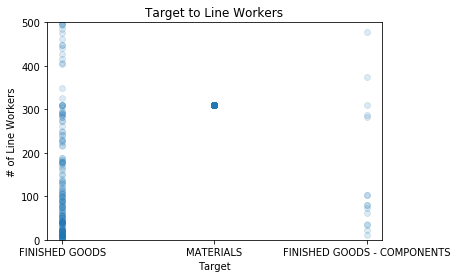

In [54]:
plt.scatter(y_train, X_train['Line Workers'], alpha = .15)
plt.title('Target to Line Workers')
plt.xlabel('Target')
plt.ylim(0 , 500)
plt.ylabel('# of Line Workers')
plt.show();

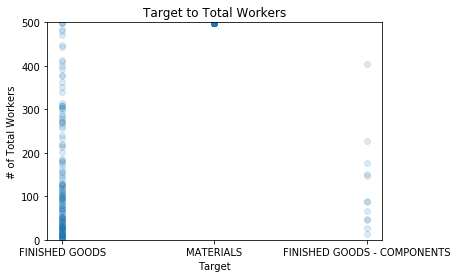

In [55]:
plt.scatter(y_train, X_train['Total Workers'], alpha = .15)
plt.title('Target to Total Workers')
plt.xlabel('Target')
plt.ylim(0 , 500)
plt.ylabel('# of Total Workers')
plt.show();

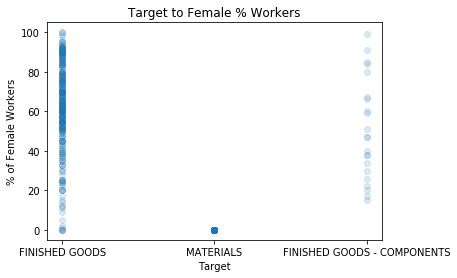

In [56]:
plt.scatter(y_train, X_train['% Female Workers'], alpha = .15)
plt.title('Target to Female % Workers')
plt.xlabel('Target')
plt.ylabel('% of Female Workers')
plt.show();

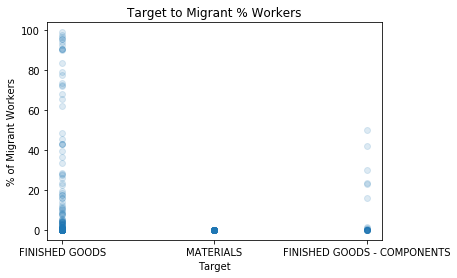

In [57]:
plt.scatter(y_train, X_train['% Migrant Workers'], alpha = .15)
plt.title('Target to Migrant % Workers')
plt.xlabel('Target')
plt.ylabel('% of Migrant Workers')
plt.show();

Higher collection of % of Migrant Workers being closer to 0 and 'FINISHED GOODS - COMPONENTS', but clouded with 'MATERIALS' and 'FINISHED GOODS' 0% metrics as well.

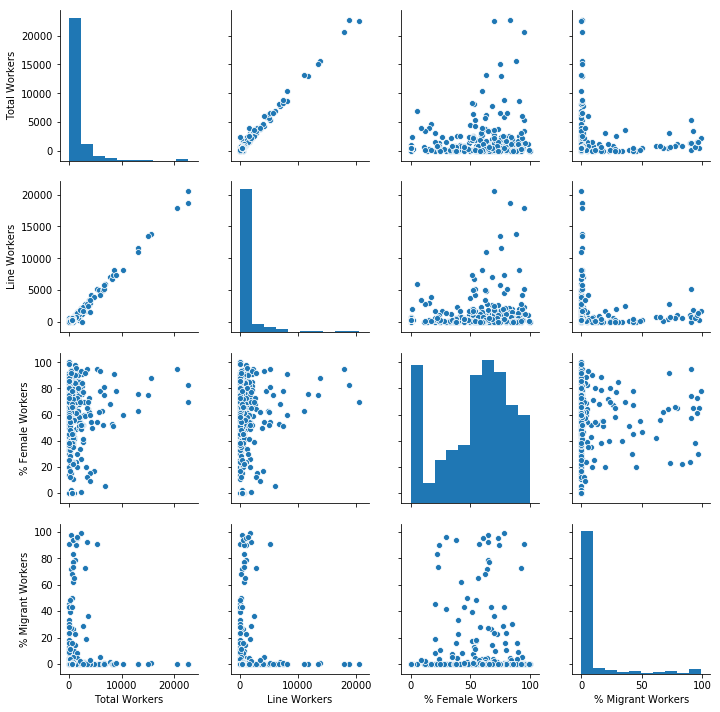

In [58]:
sns.pairplot(X_train);